In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [2]:
# загружаем набор данных
train = pd.read_csv('Data/Normality.csv', encoding='cp1251', sep=';')
# выводим первые 5 наблюдений
train.head()

,AGE,PERSONAL_INCOME,CREDIT,FST_PAYMENT,FACT_LIVING_TERM,LOAN_AVG_DLQ_AMT
0,41,20000.0,65000.0,10000.0,204.0,0.0
1,53,13000.0,16460.0,10000.0,252.0,0.0
2,23,9500.0,25000.0,12000.0,96.0,0.0
3,31,7000.0,2500.0,790.0,7.0,0.0
4,49,15000.0,9300.0,1112.0,22.0,0.0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Скос 1.0181444392860792
Эксцесс 0.9035560079843634


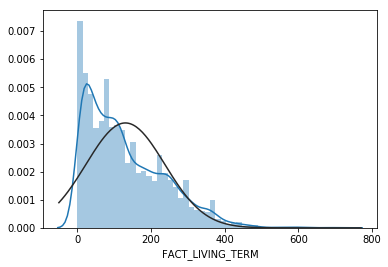

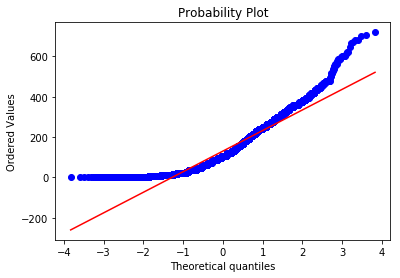

In [3]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной FACT_LIVING_TERM
sns.distplot(train['FACT_LIVING_TERM'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['FACT_LIVING_TERM'], plot=plt)
# вычисляем скос и эксцесс
print("Скос", train['FACT_LIVING_TERM'].skew())
print("Эксцесс", train['FACT_LIVING_TERM'].kurtosis())

Скос 29.75263977000883
Эксцесс 883.3956456110304


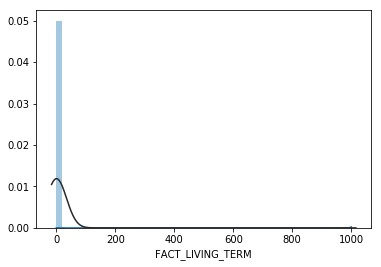

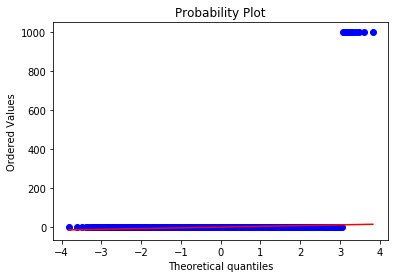

In [4]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив обратное 
# преобразование для переменной FACT_LIVING_TERM,
# используем .clip() и константу a, чтобы не брать
# отрицательные числа и ноль
a = 0.001
sns.distplot(np.reciprocal(
    train['FACT_LIVING_TERM'].clip(0) + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.reciprocal(
    train['FACT_LIVING_TERM'].clip(0) + a), plot=plt)
var = np.reciprocal(train['FACT_LIVING_TERM'].clip(0) + a)
print('Скос', var.skew())
print('Эксцесс', var.kurtosis())

Скос -1.7640436097052787
Эксцесс 7.611074431790174


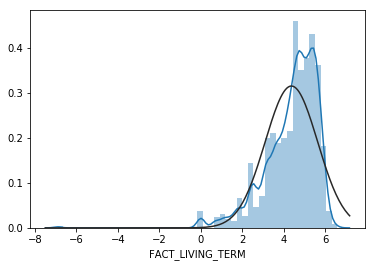

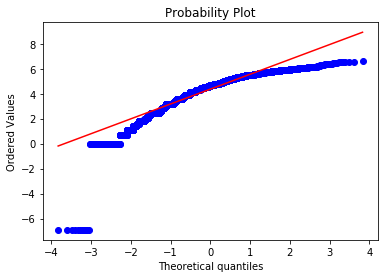

In [5]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной FACT_LIVING_TERM,
# используем .clip() и константу a, чтобы не брать
# отрицательные числа и ноль
sns.distplot(np.log(
    train['FACT_LIVING_TERM'].clip(0) + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(
    train['FACT_LIVING_TERM'].clip(0) + a), plot=plt)
var = np.log(train['FACT_LIVING_TERM'].clip(0) + a)
print('Скос', var.skew())
print('Эксцесс', var.kurtosis())

Скос -1.2103935989376935
Эксцесс 1.7514122557701395


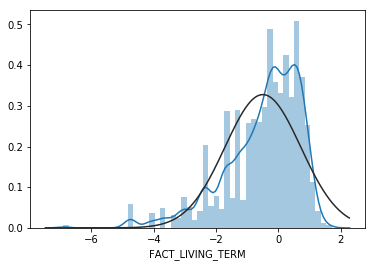

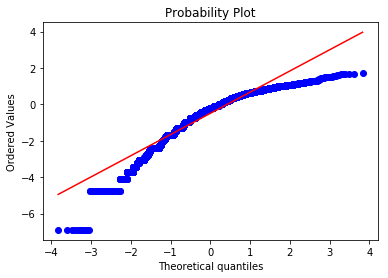

In [6]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование по формуле log(x/mean(x)+k)
# для переменной FACT_LIVING_TERM,
# где k - небольшое значение, близкое к 0,
# чтобы сильнее смещать распределение влево
k = 0.001
sns.distplot(
    np.log(((train['FACT_LIVING_TERM'].clip(0) + a) / train['FACT_LIVING_TERM'].mean()) + k), fit=norm)
fig = plt.figure()
res = stats.probplot(
    np.log(((train['FACT_LIVING_TERM'].clip(0) + a) / train['FACT_LIVING_TERM'].mean()) + k), plot=plt)
var = np.log(((train['FACT_LIVING_TERM'].clip(0) + a) / train['FACT_LIVING_TERM'].mean()) + k)
print("Скос", var.skew())
print("Эксцесс", var.kurtosis())

Скос 0.12125744641297334
Эксцесс -0.9621883609307829


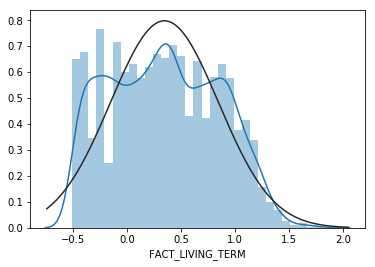

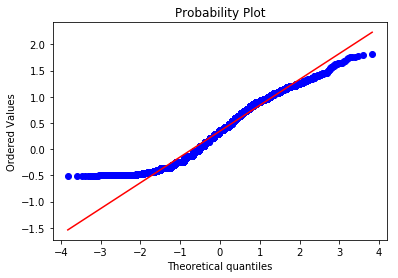

In [7]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование по формуле log(x/mean(x)+k)
# для переменной FACT_LIVING_TERM,
# где k - небольшое значение, близкое к 1,
# чтобы слабее смещать распределение влево
k = 0.6
sns.distplot(
    np.log(((train['FACT_LIVING_TERM'].clip(0) + a) / train['FACT_LIVING_TERM'].mean()) + k), 
    fit=norm)
fig = plt.figure()
res = stats.probplot(
    np.log(((train['FACT_LIVING_TERM'].clip() + a) / train['FACT_LIVING_TERM'].mean()) + k), 
    plot=plt)
var = np.log(((train['FACT_LIVING_TERM'].clip(0) + a) / train['FACT_LIVING_TERM'].mean()) + k)
print("Скос", var.skew())
print("Эксцесс", var.kurtosis())

Скос -0.4419381477873673
Эксцесс -0.30500979706137255


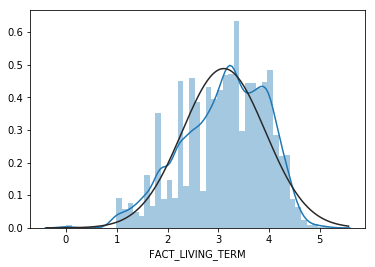

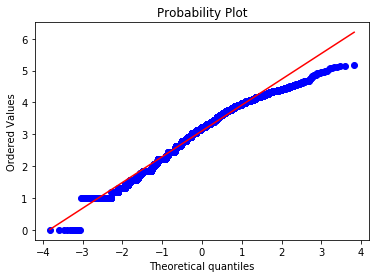

In [8]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# корнем четвертой степени для переменной FACT_LIVING_TERM, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/4)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/4)), plot=plt)
var = np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/4))
print("Скос", var.skew())
print("Эксцесс", var.kurtosis())

Скос -0.222969034559257
Эксцесс -0.6070016622741847


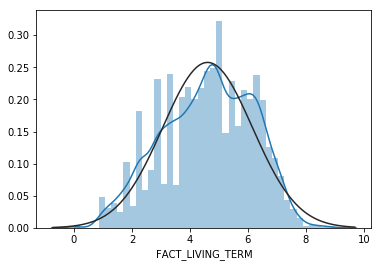

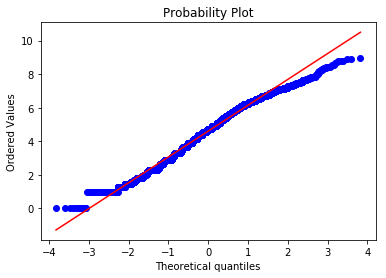

In [9]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной FACT_LIVING_TERM,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/3)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/3)), plot=plt)
var = np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/3))
print("Скос", var.skew())
print("Эксцесс", var.kurtosis())

Скос 0.13476855245733127
Эксцесс -0.7037178210399051


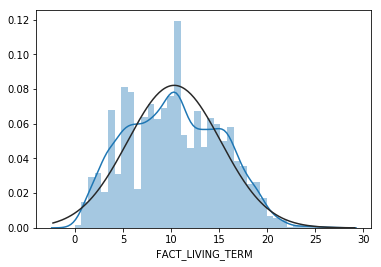

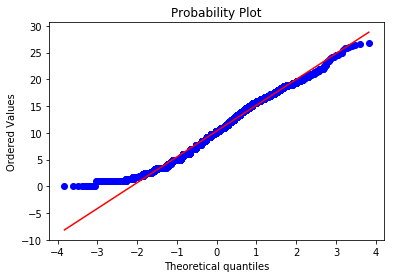

In [10]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной FACT_LIVING_TERM,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/2)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/2)), plot=plt)
var = np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/2))
print("Скос", var.skew())
print("Эксцесс", var.kurtosis())

In [11]:
# импортируем функцию boxcox
from scipy.stats import boxcox
# выполняем преобразование Бокса-Кокса
box_transformed, lam = boxcox(train['FACT_LIVING_TERM'] + a)
print("Lambda: %f" % lam)

Lambda: 0.374517


Скос -0.12680041237747264
Эксцесс -0.6780113070988993


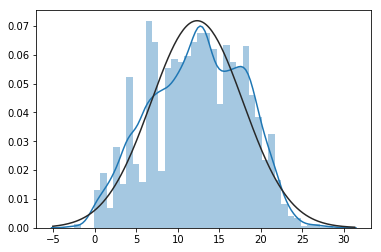

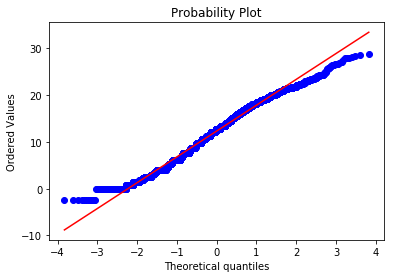

In [12]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income,
# преобразованной с помощью Бокса-Кокса
sns.distplot(box_transformed, fit=norm)
fig = plt.figure()
res = stats.probplot(box_transformed, plot=plt)
box_transformed = pd.Series(box_transformed)
print("Скос", box_transformed.skew())
print("Эксцесс", box_transformed.kurtosis())

In [13]:
# создаем список количественных переменных
num_columns = ['PERSONAL_INCOME', 'AGE', 'CREDIT']

# смотрим минимальные значения
for c in num_columns:
    print(c, train[c].min())

PERSONAL_INCOME 24.0
AGE 21
CREDIT 2000.0


In [14]:
# импортируем класс PowerTransformer
from sklearn.preprocessing import PowerTransformer
# создаем модель экземпляр класса PowerTransformer
# и обучаем ее - вычисляем лямбды
power = PowerTransformer(method='box-cox', standardize=False).fit(train[num_columns])

In [15]:
# смотрим значения lambda
print(power.lambdas_)

[-0.04318489  0.28126876 -0.03649644]


In [16]:
# применяем преобразование Бокса-Кокса к переменным
# в обучающем массиве признаков
train[num_columns] = power.transform(train[num_columns])

In [17]:
# создаем список количественных переменных
num_columns2 = ['FST_PAYMENT', 'FACT_LIVING_TERM', 'LOAN_AVG_DLQ_AMT']

In [18]:
# смотрим минимальные значения
for c in num_columns2:
    print(c, train[c].min())

FST_PAYMENT 0.0
FACT_LIVING_TERM 0.0
LOAN_AVG_DLQ_AMT 0.0


In [19]:
# создаем модель экземпляр класса PowerTransformer
# и обучаем ее - вычисляем значения lambda
power2 = PowerTransformer(method='yeo-johnson', standardize=False).fit(train[num_columns2])
# применяем преобразование Йео-Джонсона к переменным
# в обучающем массиве признаков
train[num_columns2] = power2.transform(train[num_columns2])